## Analyse GISAID statistics

In [1]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.dpi"] = 100

### Load

In [2]:
df = pd.read_csv("../5_GISAID/2021-01-01_gisaid.csv")
df["run"] = pd.Categorical(df["run"])

In [3]:
df.head()

,run,sample,barcode,sequencing_depth_avg,coverage_breadth,assembly_coverage_depth,number_base_pairs,consensus_genome_length,ref_genome_length,mean_contig_length,N50,ns_per_100kbp,sequencing_depth_avg_fastq
0,C05,20131,20,451.118253,99.451542,453.606093,13489338,29738,29902,29738.0,29738,558.472394,2612.942813
1,C05,245,7,356.056485,99.451542,358.020075,10646801,29738,29902,29738.0,29738,558.472394,599.027991
2,C05,140,2,345.405893,99.451542,347.310747,10328327,29738,29902,29738.0,29738,558.472394,624.209016
3,C05,18568,15,450.894321,99.451542,453.380927,13482642,29738,29902,29738.0,29738,558.472394,1403.450605
4,C05,111,1,451.031202,99.451542,453.518562,13486735,29738,29902,29738.0,29738,558.472394,5699.504983


### Tables

In [4]:
df.groupby("run").size()

run
C01     3
C03    22
C05    23
C07    19
C08     4
C09    23
C10    24
C11    23
C12    23
C13    24
C14    23
C15    22
C16    24
C17    23
C18    23
dtype: int64

- Number of samples per run

In [5]:
df.groupby("run").mean()

,barcode,sequencing_depth_avg,coverage_breadth,assembly_coverage_depth,number_base_pairs,consensus_genome_length,ref_genome_length,mean_contig_length,N50,ns_per_100kbp,sequencing_depth_avg_fastq
run,,,,,,,,,,,
C01,2.333333,253.406149,66.008963,255.936114,7.577351e+06,27366.333333,29902.0,14958.500000,16450.000000,35123.566197,1589.442601
C03,11.500000,273.487833,75.514560,275.380635,8.177833e+06,27324.590909,29902.0,19290.692149,20289.409091,25962.533520,916.092388
C05,12.000000,398.699481,97.436990,400.981041,1.192191e+07,29700.565217,29902.0,27693.929348,27832.086957,3163.998377,1676.866917
C07,14.000000,335.649682,85.430652,337.590328,1.003660e+07,29649.210526,29902.0,23915.650376,24104.000000,15683.554188,845.894622
C08,2.500000,114.335889,69.881613,115.035020,3.418872e+06,29541.750000,29902.0,23922.000000,25790.500000,43641.106244,0.000000
C09,12.608696,373.099947,89.365696,375.163196,1.115643e+07,29448.304348,29902.0,24245.885870,24698.391304,11301.102763,3511.524663
C10,12.500000,177.783923,92.087764,178.764371,5.316095e+06,29738.000000,29902.0,27003.576389,28155.833333,12247.143762,237.116121
C11,12.521739,348.550871,90.959017,350.545137,1.042237e+07,29596.260870,29902.0,25926.939394,26728.130435,11520.124991,2187.584034
C12,12.173913,359.775818,92.307334,361.794542,1.075802e+07,29700.565217,29902.0,26282.009662,26935.000000,8896.829840,2494.240307


- Mean statistics per run

### Plots

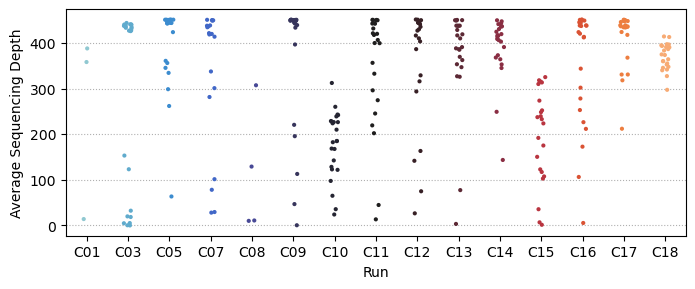

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

sns.stripplot(x="run", 
              y="sequencing_depth_avg",
              s=3.0, palette="icefire",
              data=df)

ax.set_ylabel("Average Sequencing Depth")
ax.set_xlabel("Run")
ax.grid(axis='y', linestyle='dotted')

- Notice that some runs have no samples

Text(0, 0.5, '')

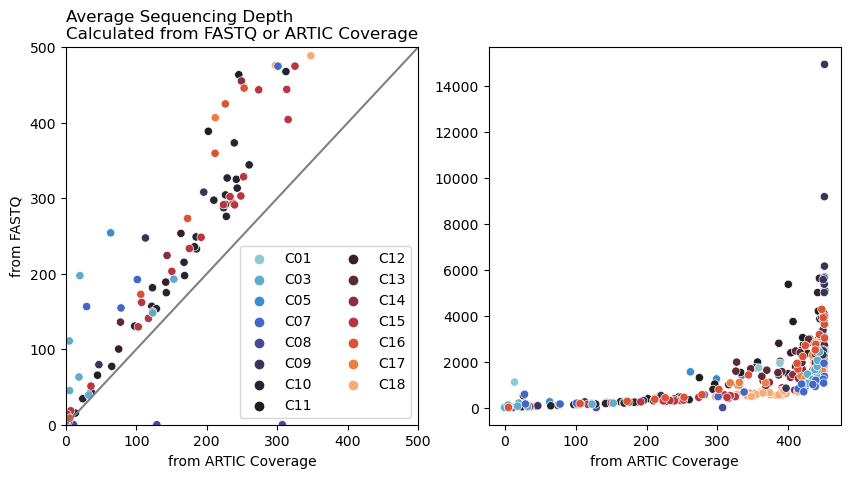

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# LIMIT TO 500X
sns.scatterplot(x=df["sequencing_depth_avg"],
                y=df["sequencing_depth_avg_fastq"],
                hue=df["run"], palette="icefire",
                ax=ax[0])
ax[0].plot([0, 500], [0, 500], linestyle='solid', color='grey')
# Labels
ax[0].set_title("Average Sequencing Depth\nCalculated from FASTQ or ARTIC Coverage", loc="left")
ax[0].set_xlabel("from ARTIC Coverage")
ax[0].set_ylabel("from FASTQ")
# Limits
ax[0].set_xlim((0, 500))
ax[0].set_ylim((0, 500))
# Legend
ax[0].legend(loc="lower right", ncol=2)

# FULL PLOT
sns.scatterplot(x=df["sequencing_depth_avg"],
                y=df["sequencing_depth_avg_fastq"],
                hue=df["run"], palette="icefire",
                ax=ax[1], legend=False)
# Labels
ax[1].set_xlabel("from ARTIC Coverage")
ax[1].set_ylabel("")

fig.savefig("../5_GISAID/coverage.png", bbox_inches="tight", pad_inches=0.5)

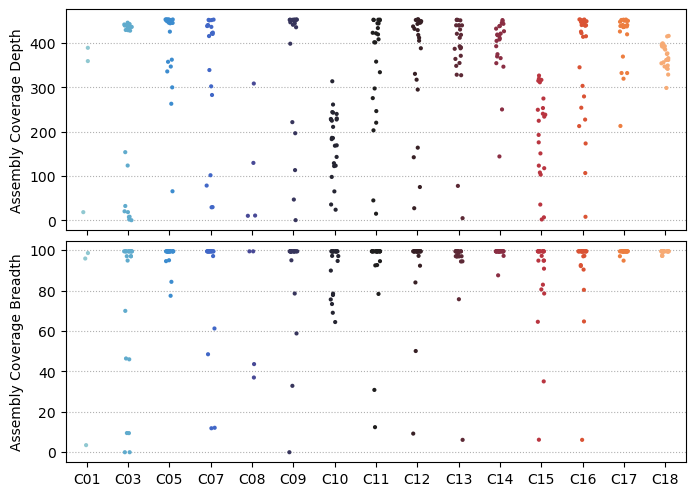

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
fig.subplots_adjust(hspace=0.05)

# Depth
sns.stripplot(x="run", 
              y="assembly_coverage_depth",
              s=3.0, palette="icefire",
              data=df, ax=ax[0])

ax[0].set_ylabel("Assembly Coverage Depth")
ax[0].set_xlabel("")
ax[0].grid(axis='y', linestyle='dotted')

# Breadth
sns.stripplot(x="run", 
              y="coverage_breadth",
              s=3.0, palette="icefire",
              data=df, ax=ax[1])

ax[1].set_ylabel("Assembly Coverage Breadth")
ax[1].set_xlabel("")
ax[1].grid(axis='y', linestyle='dotted')

fig.savefig("../5_GISAID/assembly.png", bbox_inches="tight", pad_inches=0.5)

- The coverage peaks above the threshold of 400 due to the overlap at primer sites
  - Should these site be excluded from depth calculation?